headers start on line 7


C:\Users\thoma\AppData\Local\Temp\ipykernel_15260\2067356821.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_increase['time'] = pd.to_datetime(df_increase['Time'], format='%d.%m.%Y %H:%M:%S.%f')
C:\Users\thoma\AppData\Local\Temp\ipykernel_15260\2067356821.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_decrease['time'] = pd.to_datetime(df_decrease['Time'], format='%d.%m.%Y %H:%M:%S.%f')
C:\Users\thoma\AppData\Local\Temp\ipykernel_15260\2067356821.py:66: SettingWithCopyWarning: 
A value is tr

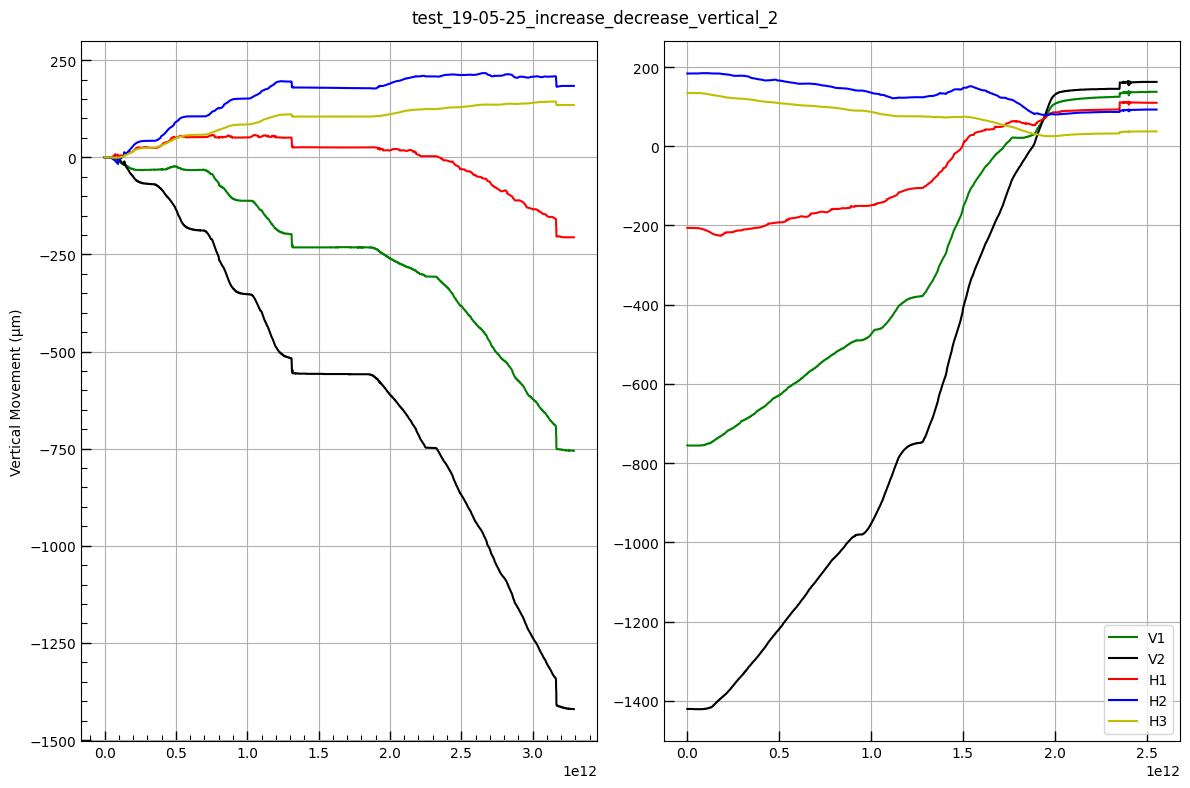


Final values from 'df_increase':
Time                          12.01.1970 23:57:32.255
Force (kg)                                          1
Sample pressure (kg/m2)                       1.27324
Hydraulic pressure (kg/m2)                    1.27324
Vertical movement 1 (um)                       -755.5
Vertical movement 2 (um)                      -1420.5
Horizontal movement 1 (um)                     -206.1
Horizontal movement 2 (um)                      183.6
Horizontal movement 3 (um)                      134.4
time                           0 days 00:54:48.908000
Name: 3217, dtype: object

Final values from 'df_decrease':
Time                          13.01.1970 03:33:15.720
Force (kg)                                          1
Sample pressure (kg/m2)                       1.27324
Hydraulic pressure (kg/m2)                    1.27324
Vertical movement 1 (um)                        137.5
Vertical movement 2 (um)                        162.5
Horizontal movement 1 (um)                

: 

In [ ]:
#19-05-25 Increase decrease together 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as scop
import csv
import matplotlib as mpl
#import seaborn as sns
#import Stoner

#THIS BLOCK Sanitises THE DATA AND CONVERTS IT FROM CGS TO SI UNITS IF REQUIRED 


#Filepath where the point the test datafile exists in so it can be accessed
#C:\Users\thoma\Documents\Physics_Work\Python Scripts\strain-cell\PPMS_Data_and_Plotting\Data\PSI_P_cell\test_9-5-25_increase+decrease-1
filepath = "C:/Users/thoma/Documents/Physics_Work/Python Scripts/strain-cell/PPMS_Data_and_Plotting/Data/PSI_P_cell/"
file = "test_19-05-25_increase_decrease_vertical_2"

FILEANDPATH=filepath+file


#The filetypes from a PPMS cryostat have a huge amount of non delimeted information at the start, this throws an error when 
#accessed using the csv pandas function so this try and except loop finds the headers as they are in csv format 
index_of_headers = 0
for i in range(100):
    try:
        df_raw_data = pd.read_csv(FILEANDPATH, sep=",", skiprows=i, encoding='unicode_escape')
        print("headers start on line", i,)
        #make a note of when headers start, need to +1 as we will skip this many rows later and the first one that works is 
        # found not to format the columns correctly
        index_of_headers = int(i+1)
        break
    except:
        None
        #print("headers don't start on line", i,)
    
#print(index_of_headers)


'''For two seperate files use below'''
#new dataframe using the index for headers we found
#C:\Users\thoma\Documents\Physics_Work\Python Scripts\strain-cell\PPMS_Data_and_Plotting\Data\PSI_P_cell\test_12-05-25_Increase_decrease_1
#df_increase = pd.read_csv("C:/Users/thoma/Documents/Physics_Work/Python Scripts/strain-cell/PPMS_Data_and_Plotting/Data/PSI_P_cell/test_19-5-25_increase_1", sep=",", skiprows= index_of_headers, encoding='unicode_escape')
#df_decrease = pd.read_csv("C:/Users/thoma/Documents/Physics_Work/Python Scripts/strain-cell/PPMS_Data_and_Plotting/Data/PSI_P_cell/test_19-05-25_decrease_1",sep=",", skiprows= index_of_headers, encoding='unicode_escape')
#print(df_increase.columns.tolist())
'''For two seperate files use above'''




'''For one combined files use below'''
#This section is to seperate the data if you save it for both increasing and decreasing in one file
df = pd.read_csv(FILEANDPATH, sep=",", skiprows= index_of_headers, encoding='unicode_escape')
target_col = 'Vertical movement 1(um)'  # Replace with your column of interest
max_index = df['Vertical movement 1 (um)'].idxmax()

# --- Split the DataFrame at the max point ---
df_increase = df.iloc[:max_index + 1]   # Include the row with the max value
df_decrease = df.iloc[max_index + 1:]
'''For one combined files use above'''


df_increase['time'] = pd.to_datetime(df_increase['Time'], format='%d.%m.%Y %H:%M:%S.%f')
df_decrease['time'] = pd.to_datetime(df_decrease['Time'], format='%d.%m.%Y %H:%M:%S.%f')
#print(df_decrease['time'])
df_decrease['time'] = pd.to_datetime(df_decrease['Time'], format='%d.%m.%Y %H:%M:%S.%f')
#print(df_decrease['time'])
# Subtract the first timestamp to get a timedelta
df_increase['time'] = df_increase['time'] - df_increase['time'].iloc[0]
df_decrease['time'] = df_decrease['time'] - df_decrease['time'].iloc[0]

#Invert vertical columns:
df_increase['Vertical movement 1 (um)'] = -df_increase['Vertical movement 1 (um)'] 
df_increase['Vertical movement 2 (um)'] = -df_increase['Vertical movement 2 (um)']
df_decrease['Vertical movement 1 (um)'] = -df_decrease['Vertical movement 1 (um)'] 
df_decrease['Vertical movement 2 (um)'] = -df_decrease['Vertical movement 2 (um)']

#invert horizontal ones too:
df_decrease['Horizontal movement 1 (um)'] = -df_decrease['Horizontal movement 1 (um)']
df_decrease['Horizontal movement 2 (um)'] = -df_decrease['Horizontal movement 2 (um)']
df_decrease['Horizontal movement 3 (um)'] = -df_decrease['Horizontal movement 3 (um)']
df_increase['Horizontal movement 1 (um)'] = -df_increase['Horizontal movement 1 (um)']
df_increase['Horizontal movement 2 (um)'] = -df_increase['Horizontal movement 2 (um)']
df_increase['Horizontal movement 3 (um)'] = -df_increase['Horizontal movement 3 (um)']

#there was a strange time jump in the data which did not happen in reality (3 hours in the middle of decreasing)

# Make sure time is parsed correctly

# Compute time difference between consecutive rows (this should be a pandas Series)
df_decrease['time_diff'] = df_decrease['time'].diff()

'''
# Check the type to make sure it's a Series
print(type(df_decrease['time_diff']))

print(type(df_decrease['time']))  # Should be Series
print(type(df_decrease['time'].diff()))  # Should also be Series
'''


# Now find the first jump greater than 10 seconds
jump_threshold = pd.Timedelta(seconds=10)
jump_rows = df_decrease[df_decrease['time_diff'] > jump_threshold]

# Safety check in case no jump is found
if not jump_rows.empty:
    jump_index = jump_rows.index[0]

    # Compute the excess time gap (over the expected 1 second step)
    time_jump = df_decrease.loc[jump_index, 'time'] - df_decrease.loc[jump_index - 1, 'time'] - pd.Timedelta(seconds=1)

    # Correct all rows from jump_index onward
    df_decrease.loc[jump_index:, 'time'] = df_decrease.loc[jump_index:, 'time'] - time_jump

# Drop helper column if you like
df_decrease.drop(columns='time_diff', inplace=True)

# Save or inspect
#print(df_increase[['Time', 'elapsed_seconds']])
#print(df_increase.columns.tolist())
#Vertical movement 1 (um),Vertical movement 2 (um),Horizontal movement 1 (um),Horizontal movement 2 (um),Horizontal movement 3 (um)






x = df_increase.loc[:,'time']
y0 = df_increase.loc[:,'Vertical movement 1 (um)']
y1 = df_increase.loc[:,'Horizontal movement 1 (um)']
y2 = df_increase.loc[:,'Horizontal movement 2 (um)']
y3 = df_increase.loc[:,'Horizontal movement 3 (um)']
y4 = df_increase.loc[:,'Vertical movement 2 (um)']

x1 = df_decrease.loc[:,'time']
y00 = df_decrease.loc[:,'Vertical movement 1 (um)'] 
y11 = df_decrease.loc[:,'Horizontal movement 1 (um)']
y22 = df_decrease.loc[:,'Horizontal movement 2 (um)']
y33 = df_decrease.loc[:,'Horizontal movement 3 (um)']
y44 = df_decrease.loc[:,'Vertical movement 2 (um)']


# Plotting
#fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6, 10))
fig, axs = plt.subplots(1, 2, figsize=(12, 8), sharex='col')

# First plot
axs[0].plot(x, y0, label='V1', color='g')
axs[0].plot(x, y4, label='V2', color='k')
axs[0].plot(x, y1, label='H1', color='r')
axs[0].plot(x, y2, label='H2', color='b')
axs[0].plot(x, y3, label='H3', color='y')

axs[0].minorticks_on()
# Customize major ticks
axs[0].tick_params(axis='both', which='major',
               direction='in',       # ticks go inward
               length=7,             # length of major ticks
               width=1)

# Customize minor ticks
axs[0].tick_params(axis='both', which='minor',
               direction='in',       # ticks go inward
               length=4,             # length of minor ticks
               width=0.8)
axs[0].grid('both')
axs[0].set_ylabel('Vertical Movement (μm)') 

figsize=(2, 4)



#Second Plot
axs[1].plot(x1, y00, label='V1', color='g')
axs[1].plot(x1, y44, label='V2', color='k')
axs[1].plot(x1, y11, label='H1', color='r')
axs[1].plot(x1, y22, label='H2', color='b')
axs[1].plot(x1, y33, label='H3', color='y')
# Customize major ticks
axs[1].tick_params(axis='both', which='major',
               direction='in',       # ticks go inward
               length=7,             # length of major ticks
               width=1)

# Customize minor ticks
axs[1].tick_params(axis='both', which='minor',
               direction='in',       # ticks go inward
               length=4,             # length of minor ticks
               width=0.8)
axs[1].grid('both')
figsize=(2, 4)

axs[1].legend()
plt.suptitle(file)
plt.tight_layout()
plt.show()

# Final values from each column
final_vals_increase = df_increase.iloc[-1]
final_vals_decrease = df_decrease.iloc[-1]

# Display results
print("\nFinal values from 'df_increase':")
print(final_vals_increase)

print("\nFinal values from 'df_decrease':")
print(final_vals_decrease)


headers start on line 7


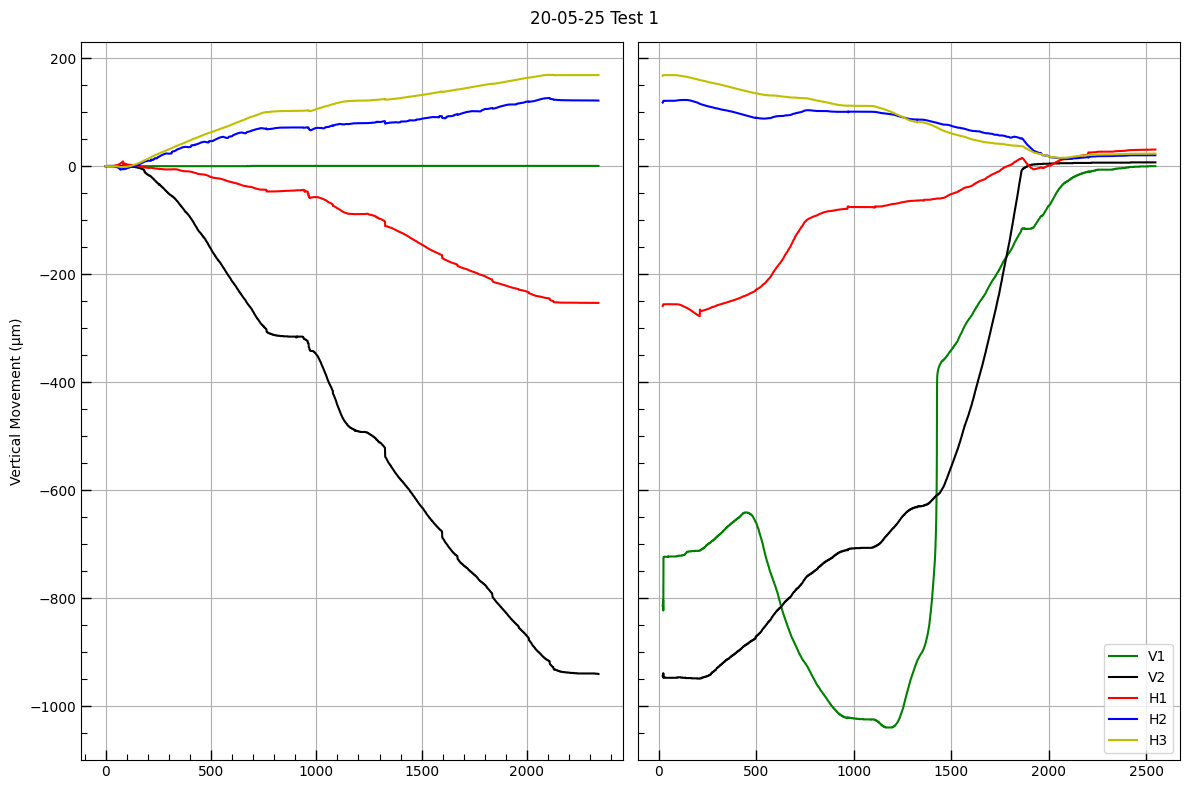


Final values from 'df_increase':
Time                          12.01.1970 23:41:43.248
Force (kg)                                          1
Sample pressure (kg/m2)                       1.27324
Hydraulic pressure (kg/m2)                    1.27324
Vertical movement 1 (um)                          0.5
Vertical movement 2 (um)                       -940.0
Horizontal movement 1 (um)                     -253.1
Horizontal movement 2 (um)                      121.4
Horizontal movement 3 (um)                      168.6
time                                         2339.901
Name: 2268, dtype: object

Final values from 'df_decrease':
Time                          12.01.1970 23:45:10.248
Force (kg)                                          1
Sample pressure (kg/m2)                       1.27324
Hydraulic pressure (kg/m2)                    1.27324
Vertical movement 1 (um)                          0.0
Vertical movement 2 (um)                          7.0
Horizontal movement 1 (um)                

In [14]:
#20_05_25 Test 1 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as scop
import csv
import matplotlib as mpl
#import seaborn as sns
#import Stoner

#THIS BLOCK Sanitises THE DATA AND CONVERTS IT FROM CGS TO SI UNITS IF REQUIRED 


#Filepath where the point the test datafile exists in so it can be accessed
#C:\Users\thoma\Documents\Physics_Work\Python Scripts\strain-cell\PPMS_Data_and_Plotting\Data\PSI_P_cell\test_9-5-25_increase+decrease-1
filepath = "C:/Users/thoma/Documents/Physics_Work/Python Scripts/strain-cell/PPMS_Data_and_Plotting/Data/PSI_P_cell/"
file = "test_19-05-25_increase_decrease_vertical_2"

FILEANDPATH=filepath+file


#The filetypes from a PPMS cryostat have a huge amount of non delimeted information at the start, this throws an error when 
#accessed using the csv pandas function so this try and except loop finds the headers as they are in csv format 
index_of_headers = 0
for i in range(100):
    try:
        df_raw_data = pd.read_csv(FILEANDPATH, sep=",", skiprows=i, encoding='unicode_escape')
        print("headers start on line", i,)
        #make a note of when headers start, need to +1 as we will skip this many rows later and the first one that works is 
        # found not to format the columns correctly
        index_of_headers = int(i+1)
        break
    except:
        None
        #print("headers don't start on line", i,)
    
#print(index_of_headers)

'''For one combined files use below'''
#This section is to seperate the data if you save it for both increasing and decreasing in one file
df = pd.read_csv(FILEANDPATH, sep=",", skiprows= index_of_headers, encoding='unicode_escape')
target_col = 'Vertical movement 1(um)'  # Replace with your column of interest
max_index = df['Vertical movement 1 (um)'].idxmax()

# --- Split the DataFrame at the max point ---
df_increase = df.iloc[:max_index + 1]   # Include the row with the max value
df_decrease = df.iloc[max_index + 1:]
'''For one combined files use above'''



'''For two seperate files use below'''
#new dataframe using the index for headers we found
#C:\Users\thoma\Documents\Physics_Work\Python Scripts\strain-cell\PPMS_Data_and_Plotting\Data\PSI_P_cell\test_12-05-25_Increase_decrease_1
df_increase = pd.read_csv("C:/Users/thoma/Documents/Physics_Work/Python Scripts/strain-cell/PPMS_Data_and_Plotting/Data/PSI_P_cell/test_20-05-25_increase_vertical_1", sep=",", skiprows= index_of_headers, encoding='unicode_escape')
df_decrease = pd.read_csv("C:/Users/thoma/Documents/Physics_Work/Python Scripts/strain-cell/PPMS_Data_and_Plotting/Data/PSI_P_cell/test_20-05-25_decrease_vertical_1",sep=",", skiprows= index_of_headers, encoding='unicode_escape')
#print(df_increase.columns.tolist())
'''For two seperate files use above'''


# Convert 'Time' to datetime and subtract start time to get relative seconds
df_increase['time'] = pd.to_datetime(df_increase['Time'], format='%d.%m.%Y %H:%M:%S.%f')
df_decrease['time'] = pd.to_datetime(df_decrease['Time'], format='%d.%m.%Y %H:%M:%S.%f')

df_increase['time'] = (df_increase['time'] - df_increase['time'].iloc[0]).dt.total_seconds()
df_decrease['time'] = (df_decrease['time'] - df_decrease['time'].iloc[0]).dt.total_seconds()

# Trim the first few rows of decrease to remove sensor glitch
df_decrease = df_decrease.iloc[20:]

##There was a jump because I didn't zero the sensor correctly, assuming it will go back to 0 approx at the end
# we can make this the offset and align it back, also the vertical sensors are defined backwards
df_decrease_max = df_decrease.iloc[-1]['Vertical movement 1 (um)']
df_decrease['Vertical movement 1 (um)'] = -df_decrease['Vertical movement 1 (um)'] + df_decrease_max
df_decrease['Vertical movement 2 (um)'] = -df_decrease['Vertical movement 2 (um)']
df_increase['Vertical movement 1 (um)'] = -df_increase['Vertical movement 1 (um)'] 
df_increase['Vertical movement 2 (um)'] = -df_increase['Vertical movement 2 (um)']

#horizontal ones too
df_decrease['Horizontal movement 1 (um)'] = -df_decrease['Horizontal movement 1 (um)']
df_decrease['Horizontal movement 2 (um)'] = -df_decrease['Horizontal movement 2 (um)']
df_decrease['Horizontal movement 3 (um)'] = -df_decrease['Horizontal movement 3 (um)']
df_increase['Horizontal movement 1 (um)'] = -df_increase['Horizontal movement 1 (um)']
df_increase['Horizontal movement 2 (um)'] = -df_increase['Horizontal movement 2 (um)']
df_increase['Horizontal movement 3 (um)'] = -df_increase['Horizontal movement 3 (um)']


#print(df_increase[['Time', 'elapsed_seconds']])
#print(df_increase.columns.tolist())
#Vertical movement 1 (um),Vertical movement 2 (um),Horizontal movement 1 (um),Horizontal movement 2 (um),Horizontal movement 3 (um)






x = df_increase.loc[:,'time']
y0 = df_increase.loc[:,'Vertical movement 1 (um)']
y1 = df_increase.loc[:,'Horizontal movement 1 (um)']
y2 = df_increase.loc[:,'Horizontal movement 2 (um)']
y3 = df_increase.loc[:,'Horizontal movement 3 (um)']
y4 = df_increase.loc[:,'Vertical movement 2 (um)']

x1 = df_decrease.loc[:,'time']
y00 = df_decrease.loc[:,'Vertical movement 1 (um)'] 
y11 = df_decrease.loc[:,'Horizontal movement 1 (um)']
y22 = df_decrease.loc[:,'Horizontal movement 2 (um)']
y33 = df_decrease.loc[:,'Horizontal movement 3 (um)']
y44 = df_decrease.loc[:,'Vertical movement 2 (um)']


# Plotting
#fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6, 10))
fig, axs = plt.subplots(1, 2, figsize=(12, 8), sharex='col', sharey='row')

# First plot
axs[0].plot(x, y0, label='V1', color='g')
#N.B. V1 WAS NOT TOUCHING DURING THE RUN, THIS WAS FIXED WHEN DECREASING (I have 
# automated the code here to 'zero' it in the decreasing data manually)
axs[0].plot(x, y4, label='V2', color='k')
axs[0].plot(x, y1, label='H1', color='r')
axs[0].plot(x, y2, label='H2', color='b')
axs[0].plot(x, y3, label='H3', color='y')

axs[0].minorticks_on()
# Customize major ticks
axs[0].tick_params(axis='both', which='major',
               direction='in',       # ticks go inward
               length=7,             # length of major ticks
               width=1)

# Customize minor ticks
axs[0].tick_params(axis='both', which='minor',
               direction='in',       # ticks go inward
               length=4,             # length of minor ticks
               width=0.8)
axs[0].grid('both')
axs[0].set_ylabel('Vertical Movement (μm)') 

figsize=(2, 4)



#Second Plot
axs[1].plot(x1, y00, label='V1', color='g')
axs[1].plot(x1, y44, label='V2', color='k')
axs[1].plot(x1, y11, label='H1', color='r')
axs[1].plot(x1, y22, label='H2', color='b')
axs[1].plot(x1, y33, label='H3', color='y')
# Customize major ticks
axs[1].tick_params(axis='both', which='major',
               direction='in',       # ticks go inward
               length=7,             # length of major ticks
               width=1)

# Customize minor ticks
axs[1].tick_params(axis='both', which='minor',
               direction='in',       # ticks go inward
               length=4,             # length of minor ticks
               width=0.8)
axs[1].grid('both')
figsize=(2, 4)

axs[1].legend()
plt.suptitle('20-05-25 Test 1')
plt.tight_layout()
plt.show()

# Final values from each column
final_vals_increase = df_increase.iloc[-1]
final_vals_decrease = df_decrease.iloc[-1]

# Display results
print("\nFinal values from 'df_increase':")
print(final_vals_increase)

print("\nFinal values from 'df_decrease':")
print(final_vals_decrease)


headers start on line 7


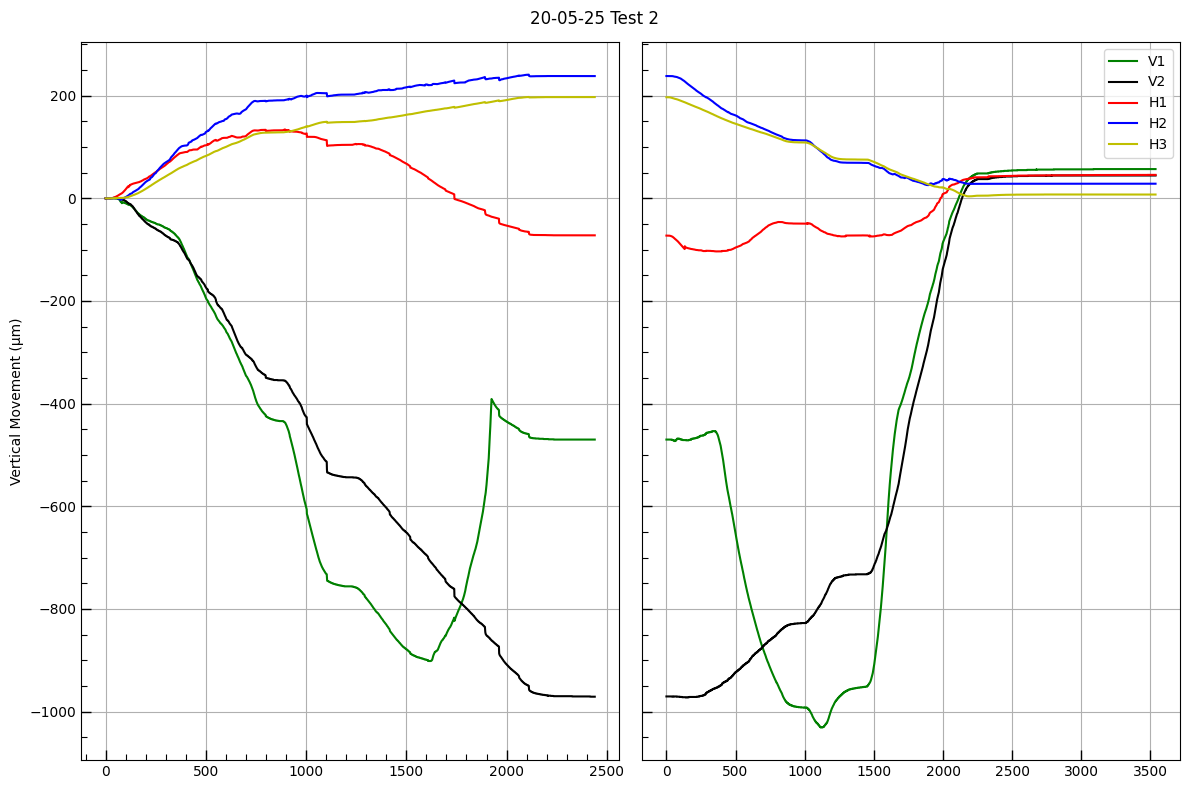


Final values from 'df_increase':
Time                          12.01.1970 23:43:23.248
Force (kg)                                          1
Sample pressure (kg/m2)                       1.27324
Hydraulic pressure (kg/m2)                    1.27324
Vertical movement 1 (um)                       -470.0
Vertical movement 2 (um)                       -971.0
Horizontal movement 1 (um)                      -72.1
Horizontal movement 2 (um)                      238.2
Horizontal movement 3 (um)                      197.3
time                                         2439.901
Name: 2368, dtype: object

Final values from 'df_decrease':
Time                          13.01.1970 00:01:40.248
Force (kg)                                          1
Sample pressure (kg/m2)                       1.27324
Hydraulic pressure (kg/m2)                    1.27324
Vertical movement 1 (um)                         57.0
Vertical movement 2 (um)                         44.5
Horizontal movement 1 (um)                

In [15]:
#20_05_25 Test 2 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as scop
import csv
import matplotlib as mpl
#import seaborn as sns
#import Stoner

#THIS BLOCK Sanitises THE DATA AND CONVERTS IT FROM CGS TO SI UNITS IF REQUIRED 


#Filepath where the point the test datafile exists in so it can be accessed
#C:\Users\thoma\Documents\Physics_Work\Python Scripts\strain-cell\PPMS_Data_and_Plotting\Data\PSI_P_cell\test_9-5-25_increase+decrease-1
filepath = "C:/Users/thoma/Documents/Physics_Work/Python Scripts/strain-cell/PPMS_Data_and_Plotting/Data/PSI_P_cell/"
file = "test_19-05-25_increase_decrease_vertical_2"

FILEANDPATH=filepath+file


#The filetypes from a PPMS cryostat have a huge amount of non delimeted information at the start, this throws an error when 
#accessed using the csv pandas function so this try and except loop finds the headers as they are in csv format 
index_of_headers = 0
for i in range(100):
    try:
        df_raw_data = pd.read_csv(FILEANDPATH, sep=",", skiprows=i, encoding='unicode_escape')
        print("headers start on line", i,)
        #make a note of when headers start, need to +1 as we will skip this many rows later and the first one that works is 
        # found not to format the columns correctly
        index_of_headers = int(i+1)
        break
    except:
        None
        #print("headers don't start on line", i,)
    
#print(index_of_headers)

'''For one combined files use below'''
#This section is to seperate the data if you save it for both increasing and decreasing in one file
df = pd.read_csv(FILEANDPATH, sep=",", skiprows= index_of_headers, encoding='unicode_escape')
target_col = 'Vertical movement 1(um)'  # Replace with your column of interest
max_index = df['Vertical movement 1 (um)'].idxmax()

# --- Split the DataFrame at the max point ---
df_increase = df.iloc[:max_index + 1]   # Include the row with the max value
df_decrease = df.iloc[max_index + 1:]
'''For one combined files use above'''



'''For two seperate files use below'''
#new dataframe using the index for headers we found
#C:\Users\thoma\Documents\Physics_Work\Python Scripts\strain-cell\PPMS_Data_and_Plotting\Data\PSI_P_cell\test_12-05-25_Increase_decrease_1
df_increase = pd.read_csv("C:/Users/thoma/Documents/Physics_Work/Python Scripts/strain-cell/PPMS_Data_and_Plotting/Data/PSI_P_cell/test_20-05-25_increase_vertical_2", sep=",", skiprows= index_of_headers, encoding='unicode_escape')
df_decrease = pd.read_csv("C:/Users/thoma/Documents/Physics_Work/Python Scripts/strain-cell/PPMS_Data_and_Plotting/Data/PSI_P_cell/test_20-05-25_decrease_vertical_2",sep=",", skiprows= index_of_headers, encoding='unicode_escape')
#print(df_increase.columns.tolist())
'''For two seperate files use above'''


# Convert 'Time' to datetime and subtract start time to get relative seconds
df_increase['time'] = pd.to_datetime(df_increase['Time'], format='%d.%m.%Y %H:%M:%S.%f')
df_decrease['time'] = pd.to_datetime(df_decrease['Time'], format='%d.%m.%Y %H:%M:%S.%f')

df_increase['time'] = (df_increase['time'] - df_increase['time'].iloc[0]).dt.total_seconds()
df_decrease['time'] = (df_decrease['time'] - df_decrease['time'].iloc[0]).dt.total_seconds()

#swap polarity on terms 
df_decrease['Vertical movement 1 (um)'] = -df_decrease['Vertical movement 1 (um)'] 
df_decrease['Vertical movement 2 (um)'] = -df_decrease['Vertical movement 2 (um)']
df_increase['Vertical movement 1 (um)'] = -df_increase['Vertical movement 1 (um)'] 
df_increase['Vertical movement 2 (um)'] = -df_increase['Vertical movement 2 (um)']

#horizontal ones too
df_decrease['Horizontal movement 1 (um)'] = -df_decrease['Horizontal movement 1 (um)']
df_decrease['Horizontal movement 2 (um)'] = -df_decrease['Horizontal movement 2 (um)']
df_decrease['Horizontal movement 3 (um)'] = -df_decrease['Horizontal movement 3 (um)']
df_increase['Horizontal movement 1 (um)'] = -df_increase['Horizontal movement 1 (um)']
df_increase['Horizontal movement 2 (um)'] = -df_increase['Horizontal movement 2 (um)']
df_increase['Horizontal movement 3 (um)'] = -df_increase['Horizontal movement 3 (um)']

#print(df_increase[['Time', 'elapsed_seconds']])
#print(df_increase.columns.tolist())
#Vertical movement 1 (um),Vertical movement 2 (um),Horizontal movement 1 (um),Horizontal movement 2 (um),Horizontal movement 3 (um)


x = df_increase.loc[:,'time']
y0 = df_increase.loc[:,'Vertical movement 1 (um)']
y1 = df_increase.loc[:,'Horizontal movement 1 (um)']
y2 = df_increase.loc[:,'Horizontal movement 2 (um)']
y3 = df_increase.loc[:,'Horizontal movement 3 (um)']
y4 = df_increase.loc[:,'Vertical movement 2 (um)']

x1 = df_decrease.loc[:,'time']
y00 = df_decrease.loc[:,'Vertical movement 1 (um)'] 
y11 = df_decrease.loc[:,'Horizontal movement 1 (um)']
y22 = df_decrease.loc[:,'Horizontal movement 2 (um)']
y33 = df_decrease.loc[:,'Horizontal movement 3 (um)']
y44 = df_decrease.loc[:,'Vertical movement 2 (um)']


# Plotting
#fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6, 10))
fig, axs = plt.subplots(1, 2, figsize=(12, 8), sharex='col', sharey='row')

# First plot
axs[0].plot(x, y0, label='V1', color='g')
axs[0].plot(x, y4, label='V2', color='k')
axs[0].plot(x, y1, label='H1', color='r')
axs[0].plot(x, y2, label='H2', color='b')
axs[0].plot(x, y3, label='H3', color='y')

axs[0].minorticks_on()
# Customize major ticks
axs[0].tick_params(axis='both', which='major',
               direction='in',       # ticks go inward
               length=7,             # length of major ticks
               width=1)

# Customize minor ticks
axs[0].tick_params(axis='both', which='minor',
               direction='in',       # ticks go inward
               length=4,             # length of minor ticks
               width=0.8)
axs[0].grid('both')
axs[0].set_ylabel('Vertical Movement (μm)') 

figsize=(2, 4)



#Second Plot
axs[1].plot(x1, y00, label='V1', color='g')
axs[1].plot(x1, y44, label='V2', color='k')
axs[1].plot(x1, y11, label='H1', color='r')
axs[1].plot(x1, y22, label='H2', color='b')
axs[1].plot(x1, y33, label='H3', color='y')
# Customize major ticks
axs[1].tick_params(axis='both', which='major',
               direction='in',       # ticks go inward
               length=7,             # length of major ticks
               width=1)

# Customize minor ticks
axs[1].tick_params(axis='both', which='minor',
               direction='in',       # ticks go inward
               length=4,             # length of minor ticks
               width=0.8)
axs[1].grid('both')
figsize=(2, 4)

axs[1].legend()
plt.suptitle('20-05-25 Test 2')
plt.tight_layout()
plt.show()


# Final values from each column
final_vals_increase = df_increase.iloc[-1]
final_vals_decrease = df_decrease.iloc[-1]

# Display results
print("\nFinal values from 'df_increase':")
print(final_vals_increase)

print("\nFinal values from 'df_decrease':")
print(final_vals_decrease)


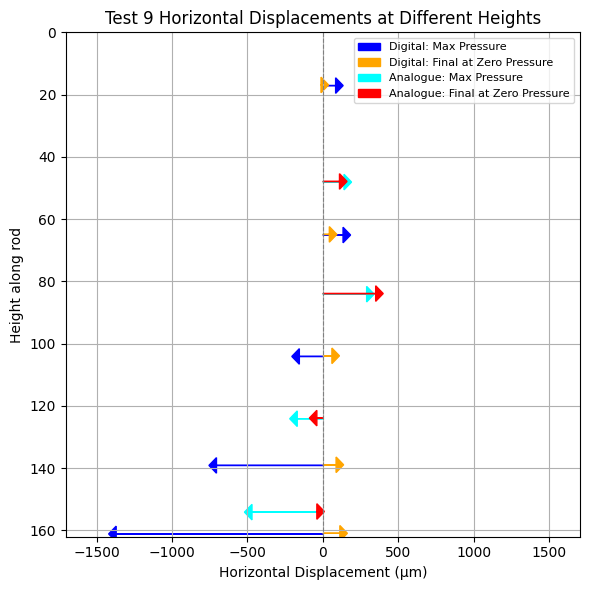

In [16]:
'''19/05/25 Increasing:
Vertical movement 1 (um)                       -755.5
Vertical movement 2 (um)                      -1420.5
Horizontal movement 1 (um)                      206.1
Horizontal movement 2 (um)                     -183.6
Horizontal movement 3 (um)                     -134.4'''

'''19/05/25 decreasing:
Vertical movement 1 (um)                        137.5
Vertical movement 2 (um)                        162.5
Horizontal movement 1 (um)                     -109.8
Horizontal movement 2 (um)                      -92.7
Horizontal movement 3 (um)                      -37.5
'''
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Heights for digital sensor
heights = [161,139,104,65,17]

# Displacement data for digital sensor
increasing_displacement = [-1420.5, -755.5,-206.1,183.6,134.4]
decreasing_displacement = [162.5,137.5,109.8,92.7,37.5]

# Heights for analogue sensor 
analogue_heights = [154,124,84,48]
#values have had sign change due to definition
analogue_increasing = [-520,-220,340,190]
analogue_decreasing = [10,-90,400,160]

fig, ax = plt.subplots(figsize=(6, 6))

# Small vertical offset so arrows don't overlap
offset = 0.1

# Digital: Increasing displacement arrows (blue)
for disp, h in zip(increasing_displacement, heights):
    ax.arrow(0, h + offset, disp, 0, head_width=5, head_length=50,
             fc='blue', ec='blue', length_includes_head=True)

# Digital: Decreasing displacement arrows (orange)
for disp, h in zip(decreasing_displacement, heights):
    ax.arrow(0, h - offset, disp, 0, head_width=5, head_length=50,
             fc='orange', ec='orange', length_includes_head=True)

# Analogue: Increasing (green)
for disp, h in zip(analogue_increasing, analogue_heights):
    ax.arrow(0, h + offset, disp, 0, head_width=5, head_length=50,
             fc='cyan', ec='cyan', length_includes_head=True)

# Analogue: Decreasing (red)
for disp, h in zip(analogue_decreasing, analogue_heights):
    ax.arrow(0, h - offset, disp, 0, head_width=5, head_length=50,
             fc='red', ec='red', length_includes_head=True)

# Vertical line at x=0
ax.axvline(0, color='gray', linestyle='--', linewidth=0.8)

# Set x and y limits
all_displacements = increasing_displacement + decreasing_displacement + analogue_increasing + analogue_decreasing
max_disp = max(abs(d) for d in all_displacements) * 1.2
ax.set_xlim(-max_disp, max_disp)
ax.set_ylim(0, max(heights + analogue_heights) + 1)

# Invert y-axis
ax.invert_yaxis()

# Labels and title
ax.set_xlabel('Horizontal Displacement (μm)')
ax.set_ylabel('Height along rod')
ax.set_title('Test 9 Horizontal Displacements at Different Heights')

# Legend
blue_patch = mpatches.Patch(color='blue', label='Digital: Max Pressure')
orange_patch = mpatches.Patch(color='orange', label='Digital: Final at Zero Pressure')
green_patch = mpatches.Patch(color='cyan', label='Analogue: Max Pressure')
red_patch = mpatches.Patch(color='red', label='Analogue: Final at Zero Pressure')
ax.legend(handles=[blue_patch, orange_patch, green_patch, red_patch], loc='upper right', fontsize=8)


plt.grid(True)
plt.tight_layout()
plt.show()

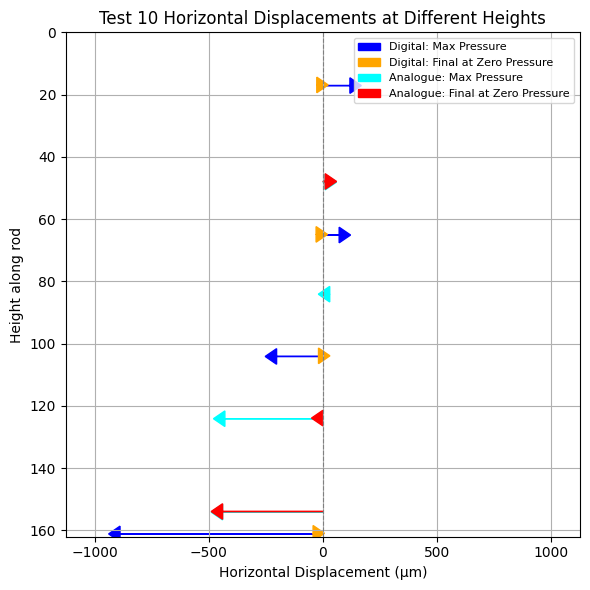

In [20]:

'''20-05-25 test 1: Increasing
Vertical movement 1 (um)                          0.5
Vertical movement 2 (um)                       -940.0
Horizontal movement 1 (um)                      253.1
Horizontal movement 2 (um)                     -121.4
Horizontal movement 3 (um)                     -168.6
'''
'''20-05-25 test 1: decreasing
Vertical movement 1 (um)                          0.0
Vertical movement 2 (um)                          7.0
Horizontal movement 1 (um)                      -30.8
Horizontal movement 2 (um)                      -20.2
Horizontal movement 3 (um)                      -23.2'''



import matplotlib.pyplot as plt



import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Heights for digital sensor
heights = [161,104,65,17]#with V1 removed

# Displacement data for digital sensor
increasing_displacement = [-940.0, -253.1, 121.4, 168.6]
decreasing_displacement = [7.0,30.8,20.2,23.2]

# Heights for analogue sensor
analogue_heights = [154,124,84,48]
#values have had sign change due to definition
analogue_increasing = [-490,-480,-20,60]
analogue_decreasing = [-490,-50,-0,60]

fig, ax = plt.subplots(figsize=(6, 6))

# Small vertical offset so arrows don't overlap
offset = 0.1

# Digital: Increasing displacement arrows (blue)
for disp, h in zip(increasing_displacement, heights):
    ax.arrow(0, h + offset, disp, 0, head_width=5, head_length=50,
             fc='blue', ec='blue', length_includes_head=True)

# Digital: Decreasing displacement arrows (orange)
for disp, h in zip(decreasing_displacement, heights):
    ax.arrow(0, h - offset, disp, 0, head_width=5, head_length=50,
             fc='orange', ec='orange', length_includes_head=True)

# Analogue: Increasing (green)
for disp, h in zip(analogue_increasing, analogue_heights):
    ax.arrow(0, h + offset, disp, 0, head_width=5, head_length=50,
             fc='cyan', ec='cyan', length_includes_head=True)

# Analogue: Decreasing (red)
for disp, h in zip(analogue_decreasing, analogue_heights):
    ax.arrow(0, h - offset, disp, 0, head_width=5, head_length=50,
             fc='red', ec='red', length_includes_head=True)

# Vertical line at x=0
ax.axvline(0, color='gray', linestyle='--', linewidth=0.8)

# Set x and y limits
all_displacements = increasing_displacement + decreasing_displacement + analogue_increasing + analogue_decreasing
max_disp = max(abs(d) for d in all_displacements) * 1.2
ax.set_xlim(-max_disp, max_disp)
ax.set_ylim(0, max(heights + analogue_heights) + 1)

# Invert y-axis
ax.invert_yaxis()

# Labels and title
ax.set_xlabel('Horizontal Displacement (μm)')
ax.set_ylabel('Height along rod')
ax.set_title('Test 10 Horizontal Displacements at Different Heights')

# Legend
blue_patch = mpatches.Patch(color='blue', label='Digital: Max Pressure')
orange_patch = mpatches.Patch(color='orange', label='Digital: Final at Zero Pressure')
green_patch = mpatches.Patch(color='cyan', label='Analogue: Max Pressure')
red_patch = mpatches.Patch(color='red', label='Analogue: Final at Zero Pressure')
ax.legend(handles=[blue_patch, orange_patch, green_patch, red_patch], loc='upper right', fontsize=8)


plt.grid(True)
plt.tight_layout()
plt.show()

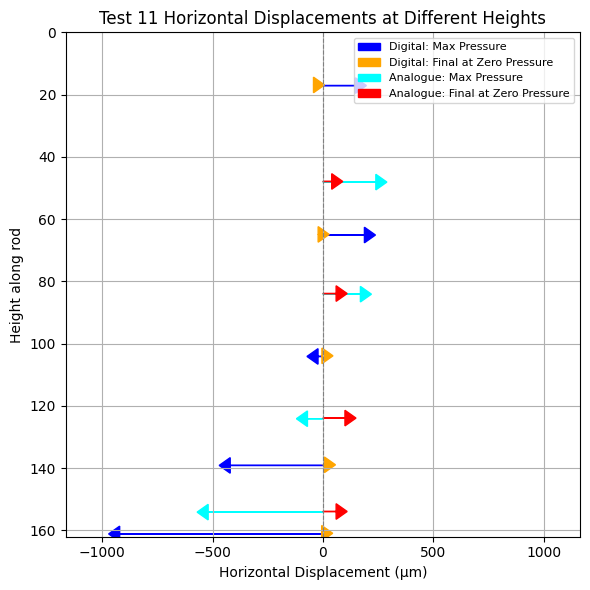

In [18]:

'''20-05-25 test 2: Increasing
Vertical movement 1 (um)                       -470.0
Vertical movement 2 (um)                       -971.0
Horizontal movement 1 (um)                       72.1
Horizontal movement 2 (um)                     -238.2
Horizontal movement 3 (um)                     -197.3
'''
'''20-05-25 test 2: decreasing
Vertical movement 1 (um)                         57.0
Vertical movement 2 (um)                         44.5
Horizontal movement 1 (um)                      -45.7
Horizontal movement 2 (um)                      -28.5
Horizontal movement 3 (um)                       -7.4'''

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Heights for digital sensor
heights = [161,139,104,65,17]

# Displacement data for digital sensor
increasing_displacement = [-971.0, -470.0, -72.1, 238.2, 197.3]
decreasing_displacement = [44.5, 57, 45.7, 28.5, 7.4]

# Heights for analogue sensor (example)
analogue_heights = [154,124,84,48]
#swap sign to be defined the same as digital sensor sign
analogue_increasing = [-570, -120, +220, +290]
analogue_decreasing = [110, 150, 110, 90]

fig, ax = plt.subplots(figsize=(6, 6))

# Small vertical offset so arrows don't overlap
offset = 0.1

# Digital: Increasing displacement arrows (blue)
for disp, h in zip(increasing_displacement, heights):
    ax.arrow(0, h + offset, disp, 0, head_width=5, head_length=50,
             fc='blue', ec='blue', length_includes_head=True)

# Digital: Decreasing displacement arrows (orange)
for disp, h in zip(decreasing_displacement, heights):
    ax.arrow(0, h - offset, disp, 0, head_width=5, head_length=50,
             fc='orange', ec='orange', length_includes_head=True)

# Analogue: Increasing (green)
for disp, h in zip(analogue_increasing, analogue_heights):
    ax.arrow(0, h + offset, disp, 0, head_width=5, head_length=50,
             fc='cyan', ec='cyan', length_includes_head=True)

# Analogue: Decreasing (red)
for disp, h in zip(analogue_decreasing, analogue_heights):
    ax.arrow(0, h - offset, disp, 0, head_width=5, head_length=50,
             fc='red', ec='red', length_includes_head=True)

# Vertical line at x=0
ax.axvline(0, color='gray', linestyle='--', linewidth=0.8)

# Set x and y limits
all_displacements = increasing_displacement + decreasing_displacement + analogue_increasing + analogue_decreasing
max_disp = max(abs(d) for d in all_displacements) * 1.2
ax.set_xlim(-max_disp, max_disp)
ax.set_ylim(0, max(heights + analogue_heights) + 1)

# Invert y-axis
ax.invert_yaxis()

# Labels and title
ax.set_xlabel('Horizontal Displacement (μm)')
ax.set_ylabel('Height along rod')
ax.set_title('Test 11 Horizontal Displacements at Different Heights')

# Legend
blue_patch = mpatches.Patch(color='blue', label='Digital: Max Pressure')
orange_patch = mpatches.Patch(color='orange', label='Digital: Final at Zero Pressure')
green_patch = mpatches.Patch(color='cyan', label='Analogue: Max Pressure')
red_patch = mpatches.Patch(color='red', label='Analogue: Final at Zero Pressure')
ax.legend(handles=[blue_patch, orange_patch, green_patch, red_patch], loc='upper right', fontsize=8)


plt.grid(True)
plt.tight_layout()
plt.show()